In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-notebook')
import matplotlib.patches as patches
plt.rcParams['figure.figsize'] = (14, 6)
%matplotlib inline

import sys, os
import datetime
import numpy as np
import netCDF4
import folium
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Numpy version: ', np.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Today: ', datetime.date.today())

Python version: 3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
Numpy version:  1.11.3
Matplotlib version:  2.0.0
Today:  2018-02-02


In [2]:
nc_arctic = netCDF4.Dataset(r"\\hdata\grid\tmp\kmu\meps\arome_arctic_pp_1km_latest.nc")

time_v = nc_arctic.variables['time']

# Choose a time-step
t_index = 6

ts = netCDF4.num2date(time_v[t_index], time_v.units)
print(ts)

lat_v = nc_arctic.variables['lat']
lon_v = nc_arctic.variables['lon']
temperature_v = nc_arctic.variables['air_temperature_2m']

2018-02-02 06:00:00


[[76.139686432035617, 9.1425666582447853], [80.792114912469046, 34.086912393687157]]
(480, 460)


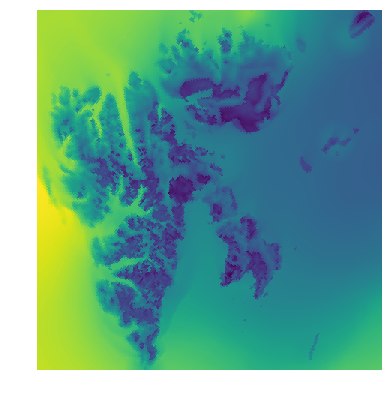

In [27]:
print([[np.min(lat_v[:]), np.min(lon_v[:])], [np.max(lat_v[:]), np.max(lon_v[:])]])

plot_data = temperature_v[t_index, 0, :, :]
dpi = 96

print(plot_data.shape)
fig = plt.figure(frameon=False, figsize=(plot_data.shape[1]/dpi, plot_data.shape[0]/dpi), tight_layout = {'pad': 0})
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.pcolor(plot_data)

fig.savefig("air_t.png", dpi=dpi)

In [32]:
t_air_layer = folium.plugins.ImageOverlay(image="air_t.png", name="Air temperature",
                                          bounds=[[np.min(lat_v[:]), np.min(lon_v[:])], [np.max(lat_v[:]), np.max(lon_v[:])]],
                                         opacity=0.6)

In [33]:
m = folium.Map(location=[78.8, 20.0], zoom_start=5)

# add location of Longyearbyen
lyr = folium.Marker([78.2166658, 15.5499978], popup='<b>Longyearbyen</b>')
lyr.add_to(m)
# add marker for bounding box with Arome Arctic data
xgeo_clip = folium.features.RectangleMarker([[76.2, 10.0], [81.0, 34.0]],
                                            color='red', weight=1, fill_color=None,
                                            fill_opacity=0.3, popup=None)
xgeo_clip.add_to(m)

# add forecasting region Nordenskiöldland - download from http://nedlasting.nve.no/gis/
# use GeoJson
regions = folium.GeoJson(os.path.join('..', 'data', 'skred_varsling_latlon.geojson'), name='NAWS forecasting regions')
regions.add_to(m)

# add netcdf layer
t_air_layer.add_to(m)

# add layer control functionality to map
folium.LayerControl().add_to(m)
# m.choropleth(geo_data='../data/skred_varsling_latlon.geojson', line_color='blue', line_weight=3)

# add lat/lon pop-up funcionality
folium.LatLngPopup().add_to(m)
#m.add_child(folium.LatLngPopup())

m